# 0.0 Imports

In [57]:
import warnings

import pandas as pd
import numpy  as np
import os

from matplotlib   import pyplot  as plt
from sklearn      import metrics as mt
from sklearn.tree import DecisionTreeClassifier

In [46]:
warnings.filterwarnings('ignore')

# 1.0 Load Datasets

In [47]:
# executando o arquivo Metrics_functions
get_ipython().run_line_magic('run', 'Metrics_functions.ipynb')

In [48]:
# carregando os dados
x_train, y_train, x_val, y_val, x_test, y_test = load_data('classificacao')

# 2.0 Training model

In [49]:
# treinamento
Tree = DecisionTreeClassifier()
Tree.fit(x_train, y_train)

# classificacao
y_pred = Tree.predict(x_train)

# metricas de performance
metrics(y_train, y_pred, 'Treinamento')

# guardando resultado
acc_train, precision_train, recall_train, f1_score_train = save_metrics(y_train, y_pred)

Metricas de Treinamento: 
Accuracy:  1.0
Precision: 1.0
Recall:    1.0
F1 Score:  1.0


## 2.1 Performance on Validation Data

In [50]:
# treinamento
Tree = DecisionTreeClassifier()
Tree.fit(x_train, y_train)

# classificacao
y_pred_val = Tree.predict(x_val)

#performance
metrics(y_val, y_pred_val, 'Validação')

#guardando resultados
acc_val, precision_val, recall_val, f1_score_val = save_metrics(y_val, y_pred_val)

Metricas de Validação: 
Accuracy:  0.946
Precision: 0.936
Recall:    0.94
F1 Score:  0.938


## 2.2 Finding The Best Parameter


### Parameter
* Max_depth

In [51]:
values = np.arange(1, 50, 1)

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

In [52]:
for i in values:
    # treinamento
    Tree = DecisionTreeClassifier(max_depth = i)
    Tree.fit(x_train, y_train)

    # classificação
    y_pred_val = Tree.predict(x_val)

    #performance 
    a, p, r, f = save_metrics(y_val, y_pred_val)

    # guardar resultados
    accuracy_list.append(a)
    precision_list.append(p)
    recall_list.append(r)
    f1_score_list.append(f)

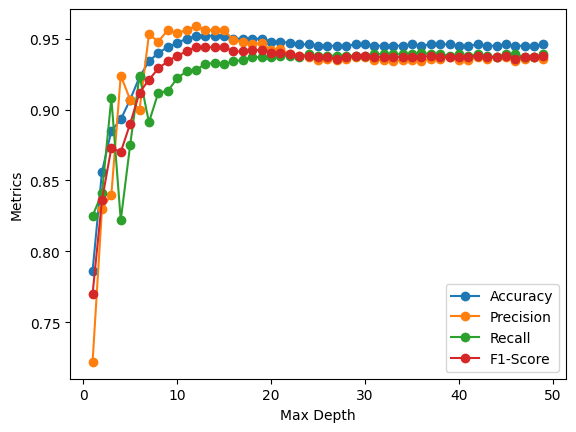

In [53]:
plt.plot(values, accuracy_list, marker = 'o', label = 'Accuracy')
plt.plot(values, precision_list, marker = 'o', label = 'Precision')
plt.plot(values, recall_list, marker = 'o', label = 'Recall')
plt.plot(values, f1_score_list, marker = 'o', label = 'F1-Score')
plt.xlabel('Max Depth')
plt.ylabel('Metrics')
plt.legend()

In [54]:
best_depth = values[np.argmax(accuracy_list)]
best_depth

12

## 2.3 Performance on Test Data

In [55]:
# treinamento
Tree = DecisionTreeClassifier(max_depth = best_depth)
Tree.fit(np.concatenate((x_train, x_val)),
         np.concatenate((y_train, y_val)))

#classificação
y_pred_test = Tree.predict(x_test)

# metricas de performance#]

metrics(y_test, y_pred_test, 'Teste')

# guardar metricas de performance
acc_test, precision_test, recall_test, f1_score_test = save_metrics(y_test, y_pred_test)

Metricas de Teste: 
Accuracy:  0.953
Precision: 0.955
Recall:    0.937
F1 Score:  0.946


# 3.0 salve Results

In [60]:
train_metrics = {
    'Algoritmo': 'Decision Tree',
    'Accuracy' : acc_train,
    'Precision': precision_train,
    'Recall'   : recall_train,
    'F1-Score' : f1_score_train
}
validation_metrics = {
    'Algoritmo': 'Decision Tree',
    'Accuracy' : acc_val,
    'Precision': precision_val,
    'Recall'   : recall_val,
    'F1-Score' : f1_score_val
}
test_metrics = {
    'Algoritmo': 'Decision Tree',
    'Accuracy' : acc_test,
    'Precision': precision_test,
    'Recall'   : recall_test,
    'F1-Score' : f1_score_test
}

train = pd.DataFrame([train_metrics])
validation = pd.DataFrame([validation_metrics])
test = pd.DataFrame([test_metrics])

train.to_csv(
    './train_metrics_classificacao.csv',
    mode ='a',
    index=False,
    header=not os.path.exists('./train_metrics_classificacao.csv')
)

validation.to_csv(
    './validation_metrics_classificacao.csv',
    mode ='a',
    index=False,
    header=not os.path.exists('./validation_metrics_classificacao.csv')
)

test.to_csv(
    './test_metrics_classificacao.csv',
    mode ='a',
    index=False,
    header=not os.path.exists('./test_metrics_classificacao.csv')
)